# Binary Classification with a Bank Churn Dataset
Playground Series - Season 4, Episode 1

In [48]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

## Datasets Loading

In [49]:
#df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv') # I'm using train dataset for model training
#test  = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
#sample_sub = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')

df = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

## Data Observation

In [50]:
print(f"Dataset Shape : Train {df.shape} Test {test.shape} Sample Submission {sample_sub.shape}")

Dataset Shape : Train (165034, 14) Test (110023, 13) Sample Submission (110023, 2)


In [51]:
# View the train dataset content, highlight the numeric columns 
df.head().style.background_gradient()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.000000,3,0.000000,2,1.000000,0.000000,181449.970000,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.000000,1,0.000000,2,1.000000,1.000000,49503.500000,0
2,2,15694510,Hsueh,678,France,Male,40.000000,10,0.000000,2,1.000000,0.000000,184866.690000,0
3,3,15741417,Kao,581,France,Male,34.000000,2,148882.540000,1,1.000000,1.000000,84560.880000,0
4,4,15766172,Chiemenam,716,Spain,Male,33.000000,5,0.000000,2,1.000000,1.000000,15068.830000,0


## Exploratory Data Analysis & Visualization

In [52]:
# Check the train data properties
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [53]:
# Check if there is any missing or duplicate values in the dataset
print('missing  ', (df.isnull().sum() / len(df) * 100).values)
print('null     ', (df.isna().sum() / len(df) * 100).values)
print('duplicate', [df.duplicated().sum()])

# Delete duplicates and drop null rows if any
df = df.drop_duplicates(keep='first')
df = df.dropna()

missing   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
null      [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
duplicate [0]


In [54]:
# Check data features info and Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [55]:
# Split quantitative from categorical features
exclude_features     = ['id', 'CustomerId', 'Surname', 'Exited']
numeric_features     = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

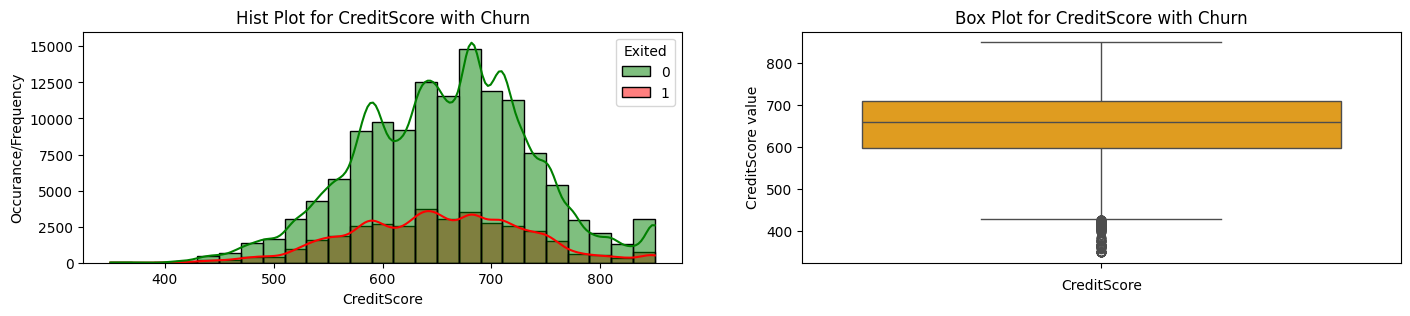

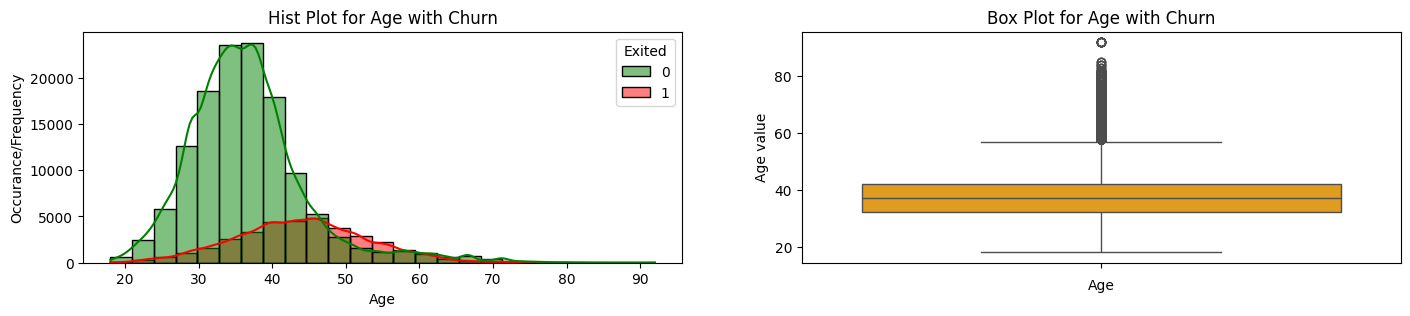

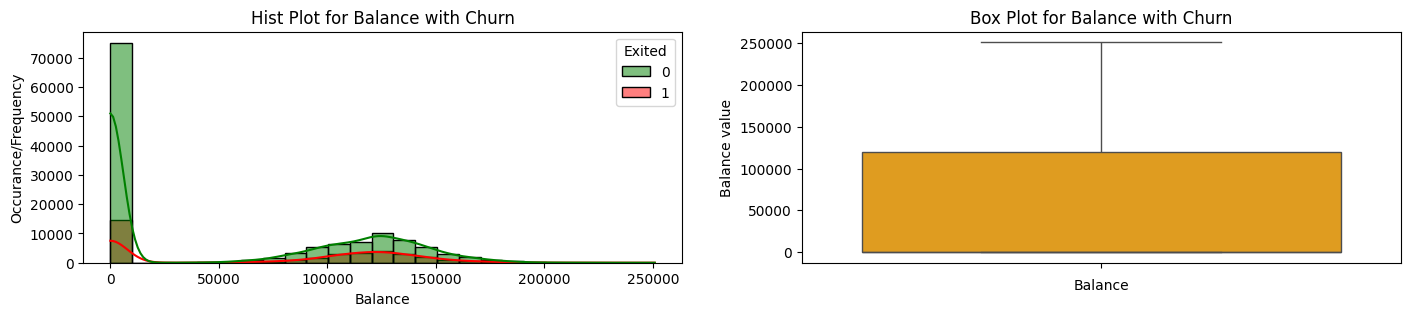

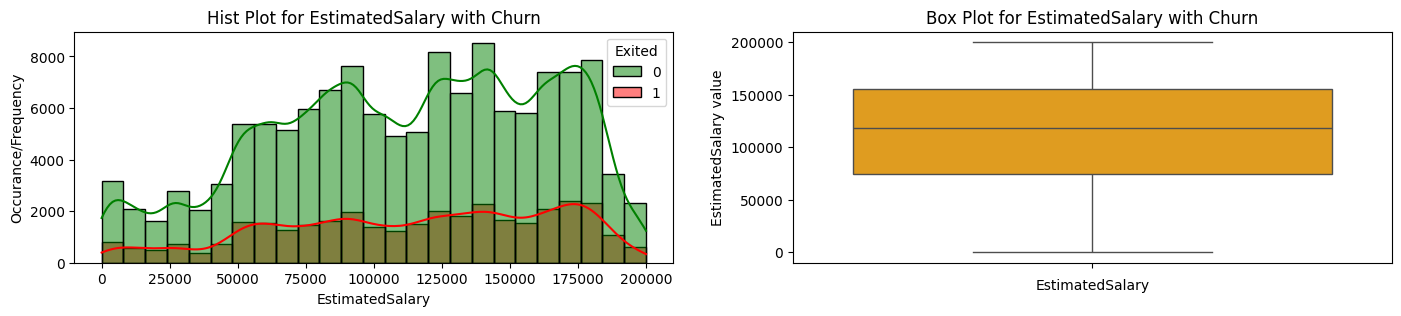

In [56]:
# Create a histogram plot for numeric features
import matplotlib.pyplot as plt
import seaborn as sns
def plot_numeric(data: pd.DataFrame, column) -> None:
  _, ax = plt.subplots(1, 2, figsize=(17, 3))
  sns.histplot(data=df, x=column, hue='Exited', kde=True, bins=25, palette={0:'green', 1:'red'}, ax=ax[0])
  ax[0].set_title(f'Hist Plot for {column} with Churn', y=1, size=12)
  ax[0].set_xlabel(column)
  ax[0].set_ylabel('Occurance/Frequency')
  sns.boxplot(data=df[column], color='orange', ax=ax[1])
  ax[1].set_title(f'Box Plot for {column} with Churn', y=1, size=12)
  ax[1].set_xlabel(column)
  ax[1].set_ylabel(f'{column} value')

for feature in numeric_features:
  plot_numeric(data=df, column=feature)

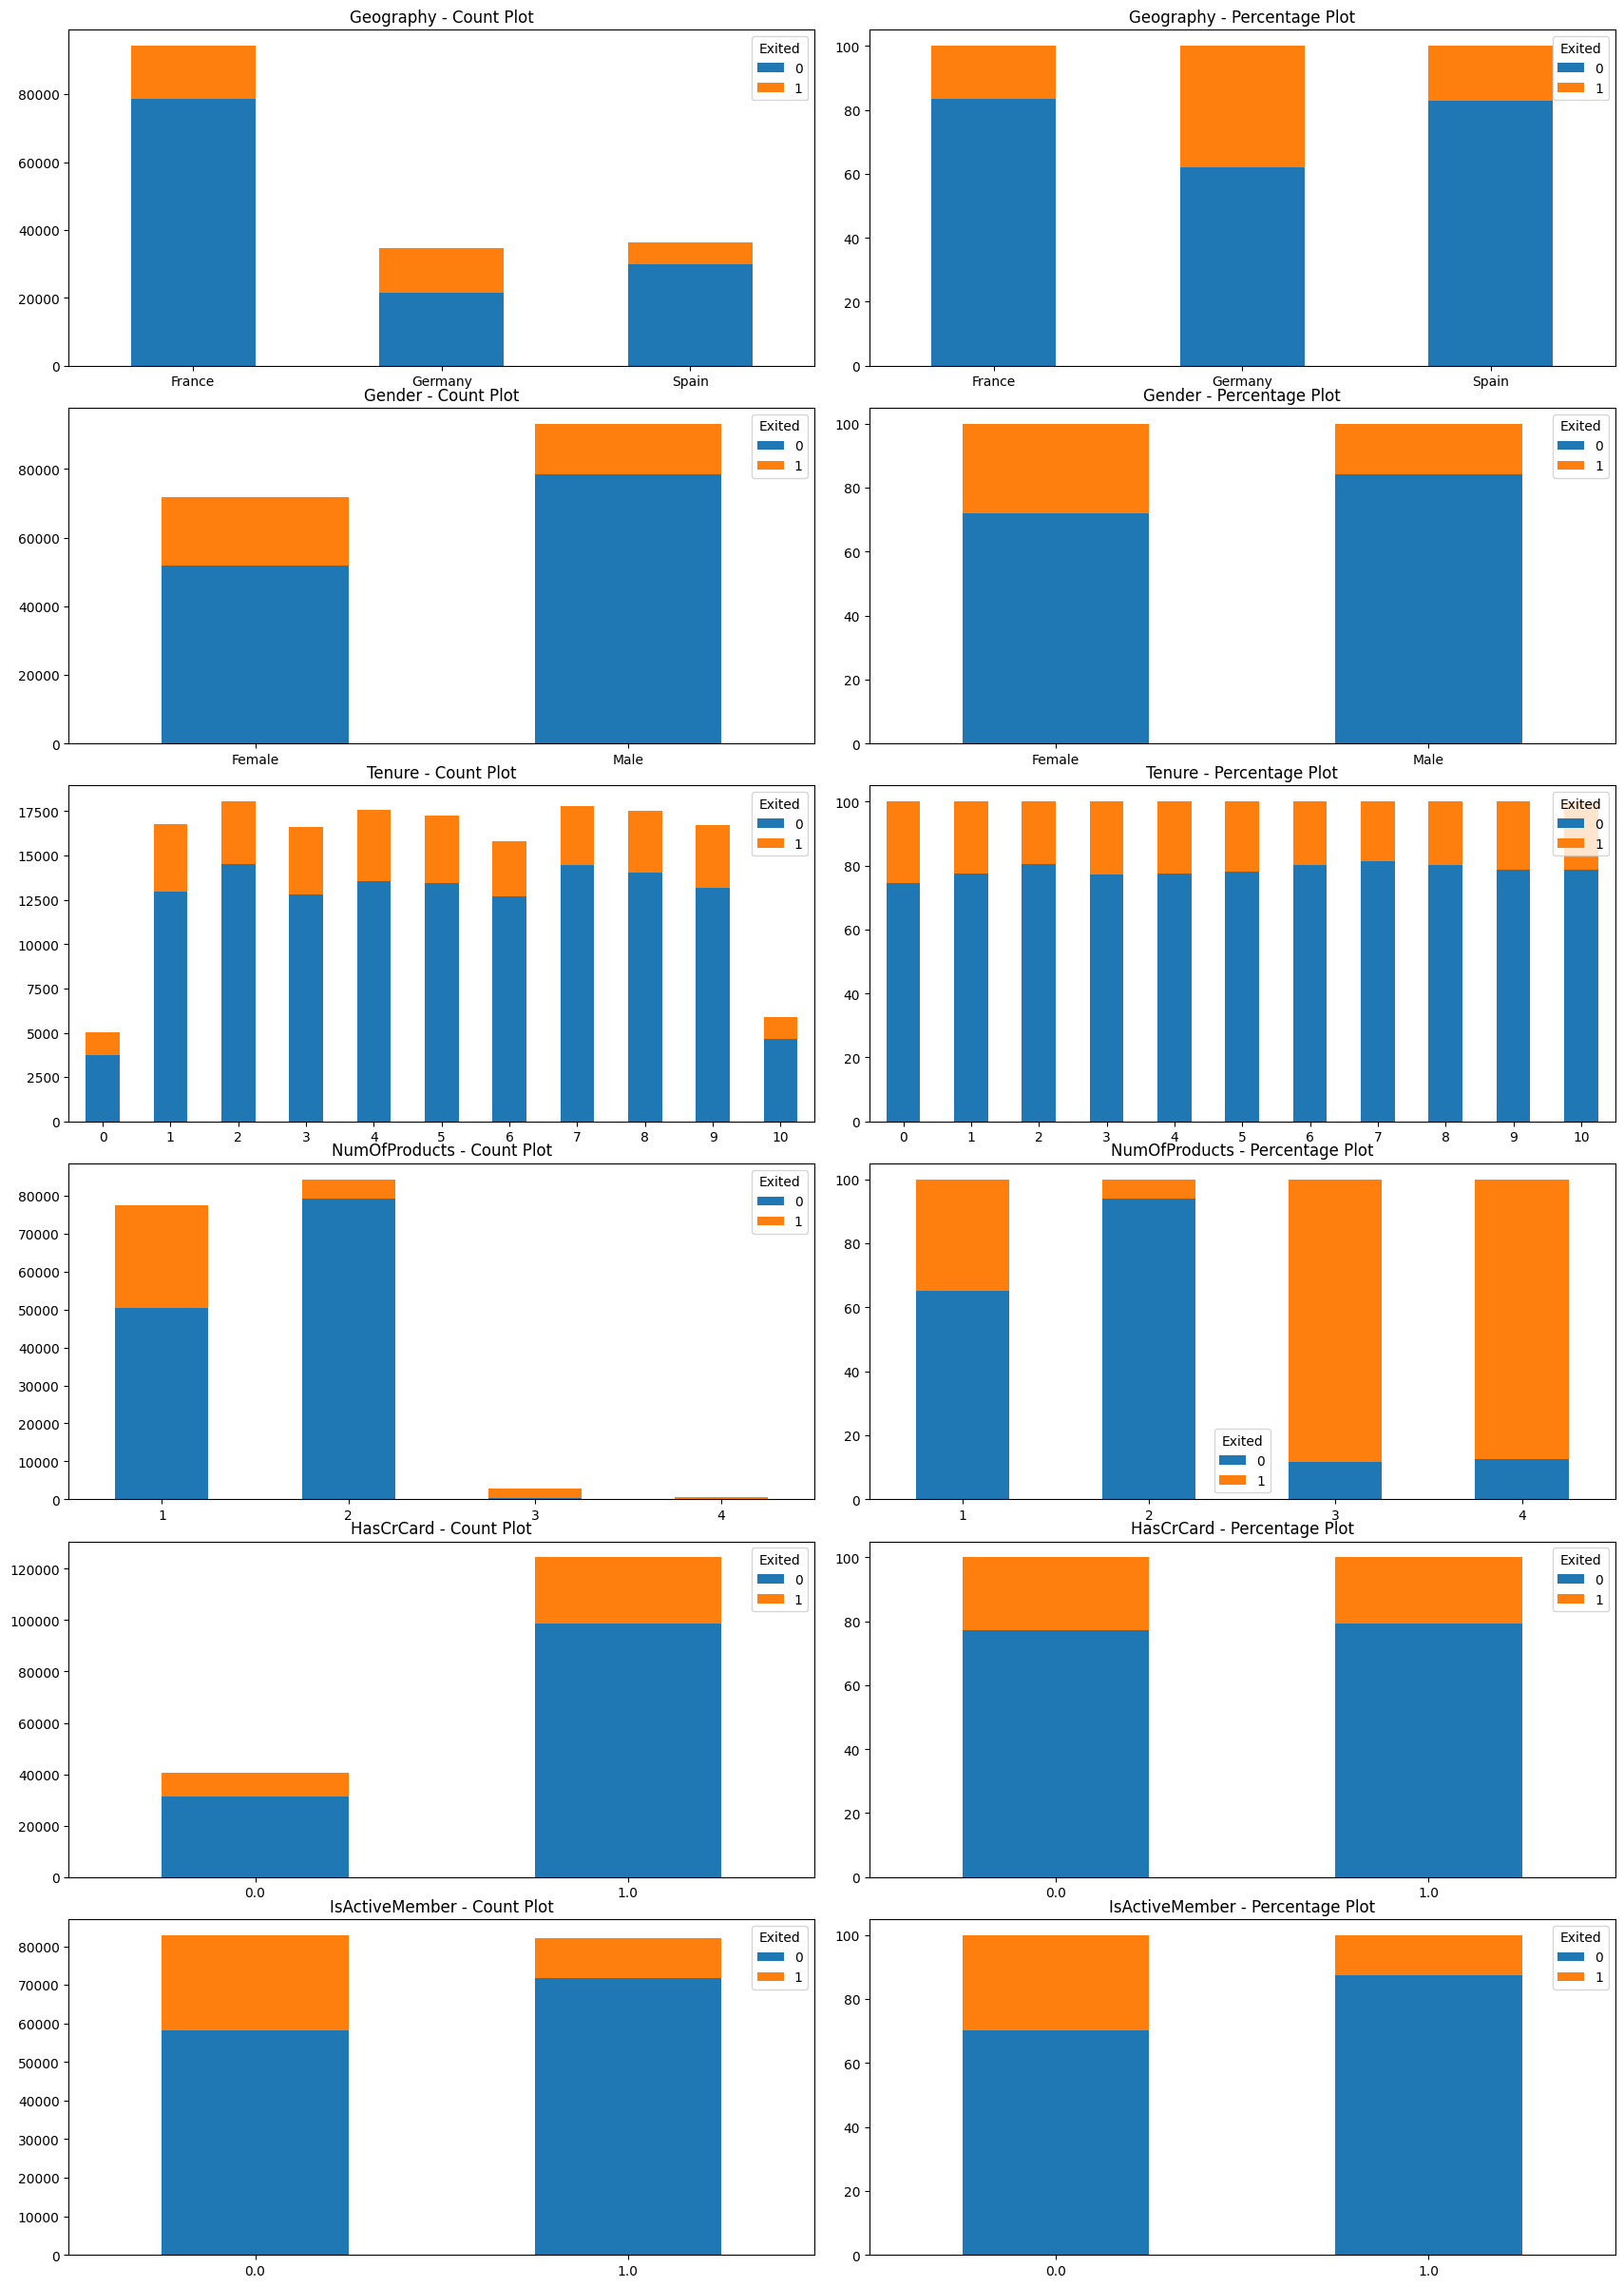

In [57]:
# Create barplot for catagorical features
fig, ax = plt.subplots(6, 2, figsize=(17, 24))
fig.tight_layout()
for i, columns in enumerate(categorical_features):
  j=0
  cross_tab = pd.crosstab(df[columns], df['Exited'])
  cross_tab.plot(kind='bar', stacked=True, rot=0, xlabel='', title=(f'{columns} - Count Plot'), ax=ax[i, j])

  cross_tab_p = pd.crosstab(df[columns], df['Exited'], normalize='index') * 100
  cross_tab_p.plot(kind='bar', stacked=True, rot=0, xlabel='', title=(f'{columns} - Percentage Plot'), ax=ax[i,j+1])

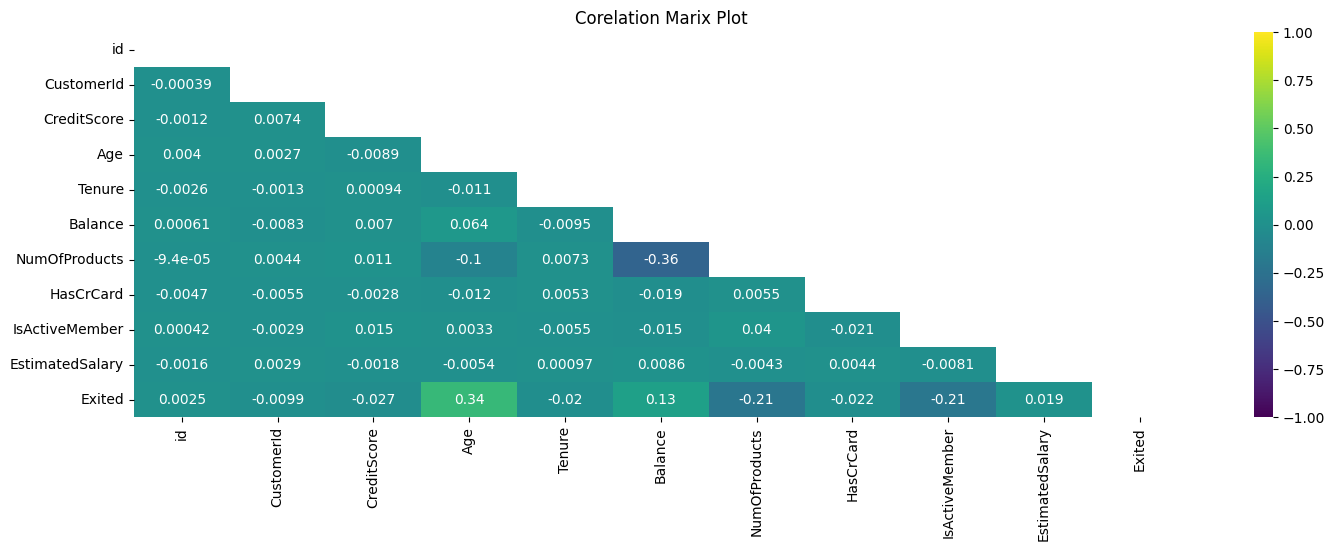

In [58]:
# Plot the corelation matrix to see if any feature is hightly corelated
plt.figure(figsize=(17,5))
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis', mask=mask) #, vmin=-1, vmax=1)
plt.title('Corelation Marix Plot')
plt.show()

Exited = 1 (Yes) represents around 21 % of the cases


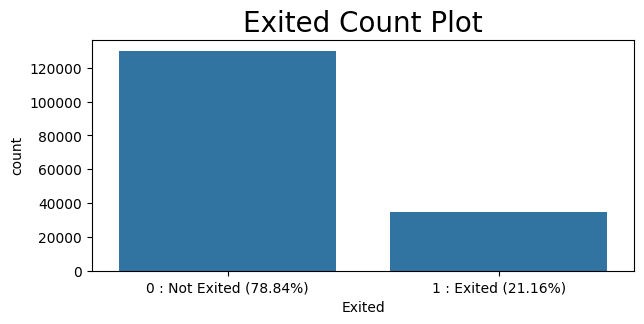

In [59]:
# Check the percentage of Exited customer
fig, ax = plt.subplots(figsize=(7,3))
sns.countplot(data=df, x="Exited")
exit_count = df['Exited'].value_counts()[1]
not_exit_count = df['Exited'].value_counts()[0]
exit_count_per = exit_count / df.shape[0] * 100
not_exit_count_per = not_exit_count / df.shape[0] * 100
ax.set_title('Exited Count Plot', size=20)
plt.xticks((0, 1), ['0 : Not Exited ({0:.2f}%)'.format(not_exit_count_per), '1 : Exited ({0:.2f}%)'.format(exit_count_per)])
print(f'Exited = 1 (Yes) represents around {round(exit_count_per)} % of the cases')

### EDA Findings
- Percentage of Exits -> 21% [Imbalance data]
- No Missings or duplicate value values :)
- Unrelated features 'id', 'CustomerId', 'Surname'
- Huge variance Balance and EstimatedSalary
- Imbance distribution on few features such as NumOfProducts, HasCrCard, Geography (But I'm not going to do anything on this)

### Proposed Actions
- Remove unrelated features 'id', 'CustomerId', 'Surname'
- One-hot encoding for categorical variables ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
- Normalize the data to reduce variance

## Data Preparation for Training

### Remove unrelated features 'id', 'CustomerId', 'Surname'

In [60]:
X = df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']
test_X = test.drop(['id', 'CustomerId', 'Surname'], axis=1) # Remove it from given Test Dataset as well

### One-hot encoding for categorical variables

In [61]:
X = pd.get_dummies(data=X, columns=categorical_features, drop_first=True)
test_X = pd.get_dummies(data=test_X, columns=categorical_features, drop_first=True)

### Normalize the data to reduce variance

In [62]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
test_X_scaled = StandardScaler().fit_transform(test_X)
X_scaled.shape, test_X_scaled.shape

((165034, 22), (110023, 22))

### Create Data for Train and Test; over-sampled the Train data

In [63]:
# Define Random_state for reproducing the results
random_state = 100

In [64]:
# split the datasetinto training and testing set, use stratify on y dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.25,random_state=random_state)

# Over-sample the training date..
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=random_state)
X_resample, y_resample = smote.fit_resample(X_train, y_train)

## Model Training

### Define funtions and House Keeping

In [82]:
# Create an empty DF to store all matrices produced by the models
matrix_df = pd.DataFrame(columns=['model', 'Train_Accuracy', 'Train_Precision', 'Train_Recall', 'Train_F1', 'train_roc_auc', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'test_roc_auc'])

In [95]:
# Create calculation and plotting functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
def accuracy_report(model_name, model, X_train, y_train, X_test, y_test, plotting=True):

    if model_name == 'keras.Sequential':                        # NN Model predicts as probability, converting them to number (0 or 1)
      y_pred_train   = model.predict(X_train)
      y_pred_test    = model.predict(X_test)
      y_score_train = y_pred_train
      y_score_test  = y_pred_test
      y_pred_train  = np.round(y_pred_train)
      y_pred_test   = np.round(y_pred_test)
    else:
      y_pred_train   = model.predict(X_train)
      y_pred_test    = model.predict(X_test)
      y_score_train  = model.predict_proba(X_train)[:,1]
      y_score_test   = model.predict_proba(X_test)[:,1]

    print('Train Classification Report:\n------------------------------------------------')
    print(classification_report(y_train, y_pred_train))
    train_fpr, train_tpr, train_roc_auc = calculate_roc(y_train, y_score_train)
    Train_Accuracy, Train_Precision, Train_Recall, Train_F1 = calculate_scores(y_train, y_pred_train)
    if plotting:
        plot_data('Train', train_fpr, train_tpr, train_roc_auc, y_train, y_pred_train)
        plt.show()

    print('Test  Classification Report:\n------------------------------------------------')
    print(classification_report(y_test, y_pred_test))
    test_fpr, test_tpr, test_roc_auc = calculate_roc(y_test, y_score_test)
    Test_Accuracy, Test_Precision, Test_Recall, Test_F1 = calculate_scores(y_test, y_pred_test)
    if plotting:
        plot_data('Test', test_fpr, test_tpr, test_roc_auc, y_test, y_pred_test)
        plt.show()

    return_matrices = [model_name, Train_Accuracy, Train_Precision, Train_Recall, Train_F1, train_roc_auc, Test_Accuracy, Test_Precision, Test_Recall, Test_F1, test_roc_auc]
    return return_matrices

def calculate_scores(y, y_pred):
    Accuracy = accuracy_score(y, y_pred)
    Precision= precision_score(y, y_pred)
    Recall   = recall_score(y, y_pred)
    F1       = 2 * ((Precision * Recall) / (Precision + Recall))
    return (Accuracy, Precision, Recall, F1)

def calculate_roc(y, y_score):
    fpr, tpr, _ = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    return (fpr, tpr,roc_auc)

def plot_data(title, fpr, tpr, roc_auc, y, y_pred):
    plt.figure(figsize=(10, 3))
    plt.subplot(1,2,1)
    plot_roc(title, fpr, tpr, roc_auc)
    plt.subplot(1,2,2)
    plot_cm(title, y, y_pred)

def plot_roc(title, fpr, tpr,roc_auc):
    plt.plot(fpr, tpr, color='darkorange', lw=2, label= f'{title} ROC curve (area = {(roc_auc):.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{title} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.grid(which='major', color='gray', linestyle='--')

def plot_cm(title, true, pred):
    cm = confusion_matrix(true, pred)
    sns.heatmap(cm, annot=True, fmt="d",cmap=plt.cm.Blues)
    plt.xlabel("Predicted Value")
    plt.title(f'{title} - Confusion Matrix')
    plt.ylabel("True Value")

### Import necessary modules

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from tensorflow import keras
from sklearn.metrics import roc_auc_score
from tqdm.auto import tqdm

### Check AUC scores for common classification models

In [77]:
classifiers = []
AUC_score = pd.DataFrame(columns=['classifier', 'train_auc_score', 'test_auc_score'])

classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(XGBClassifier(random_state=random_state))

for i, classifier in enumerate(tqdm(classifiers)):
    classifier.fit(X_resample, y_resample,)
    y_train_pred = classifier.predict_proba(X_resample)[:, 1]
    y_test_pred  = classifier.predict_proba(X_test)[:, 1]

    train_auc    = roc_auc_score(y_resample, y_train_pred)
    test_auc     = roc_auc_score(y_test, y_test_pred)

    AUC_score.loc[i] = str(classifier).split('(')[0], train_auc, test_auc

100%|██████████| 11/11 [06:32<00:00, 35.70s/it]


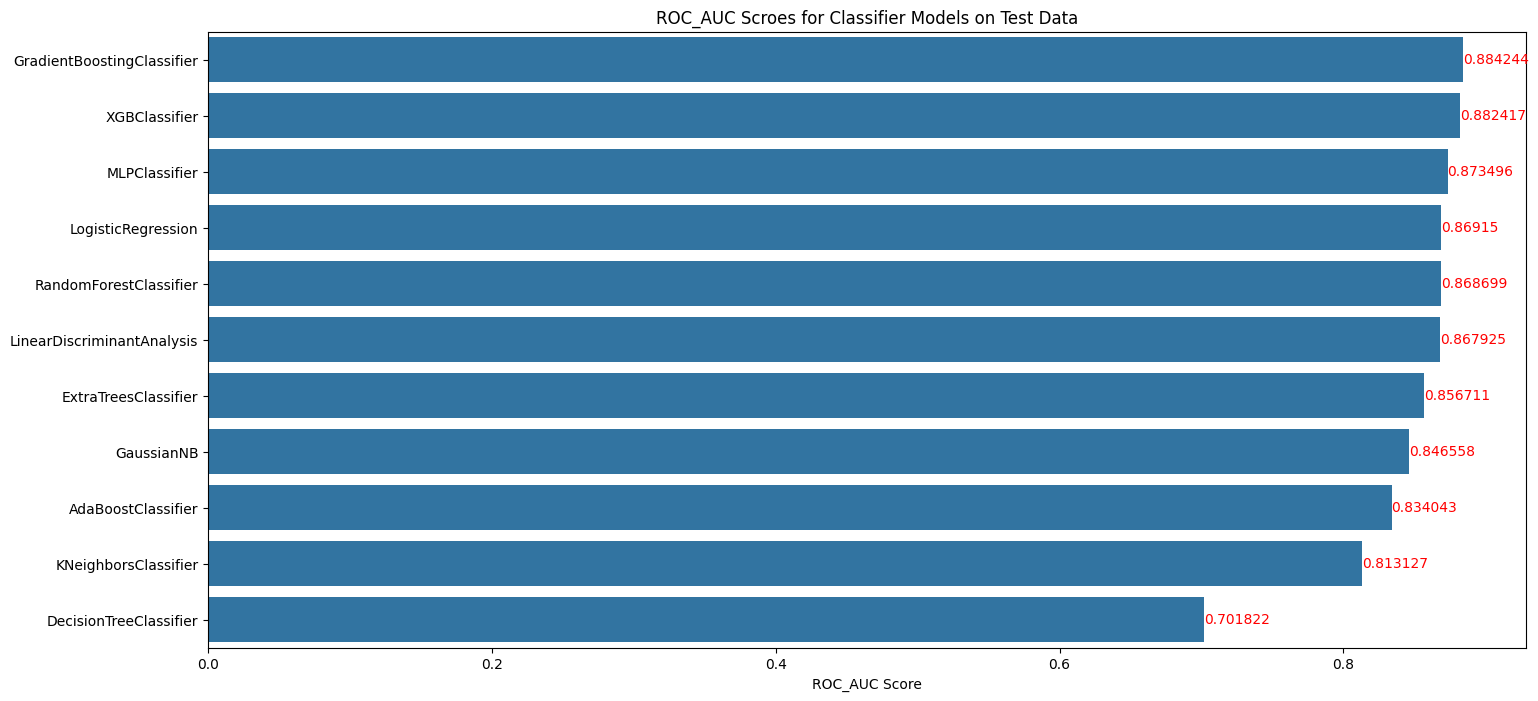

In [78]:
# Plot the Test AUC scores for all above modules
AUC_score = AUC_score.sort_values('test_auc_score', ascending=False) # Sort the score
plt.subplots(figsize=(17,8))
bar = sns.barplot(data=AUC_score, y="classifier", x="test_auc_score",orient="h")
plt.title('ROC_AUC Scroes for Classifier Models on Test Data', size=12)
plt.ylabel('')
plt.xlabel('ROC_AUC Score')
for container in bar.containers:
    bar.bar_label(container, c='red', label_type='edge')
plt.show()

### Hyper Parameters Tuning for High scoring models
1. Gradient Boosting Classifier
2. XGB Classifier
3. MLP Classifier
4. Logistic Regression Classifier
5. Random Foest Classifier
6. Keras Sequention DeepLearing model (To observe if DL can improve the AUC score)

#### 1. Gradient Boosting Classifier

Train Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     97584
           1       0.62      0.72      0.66     26191

    accuracy                           0.85    123775
   macro avg       0.77      0.80      0.78    123775
weighted avg       0.86      0.85      0.85    123775



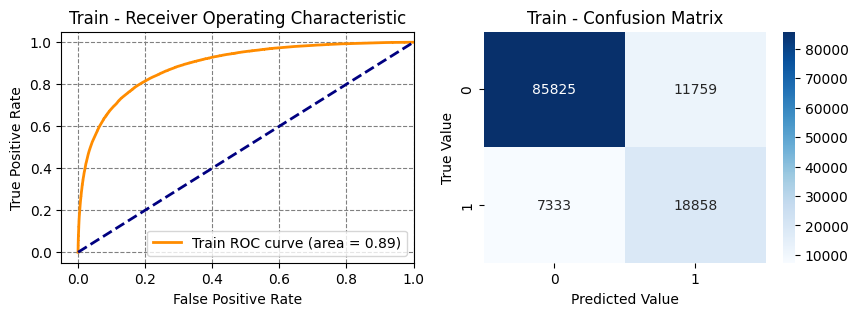

Test  Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     32529
           1       0.61      0.71      0.66      8730

    accuracy                           0.84     41259
   macro avg       0.76      0.79      0.78     41259
weighted avg       0.85      0.84      0.85     41259



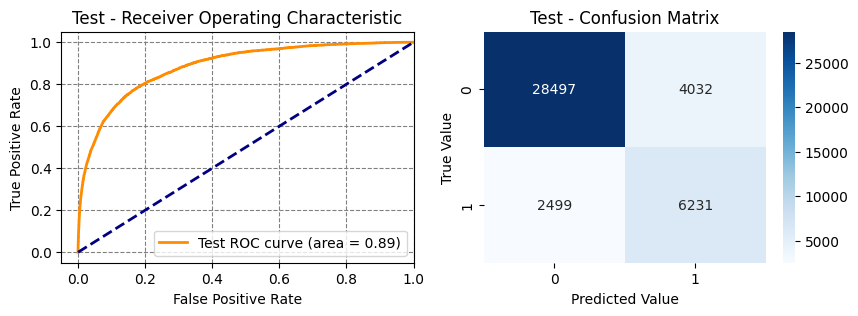

In [85]:
GB_classifier = GradientBoostingClassifier(max_depth=5, min_samples_split=6, random_state=random_state)
GB_classifier.fit(X_resample, y_resample)
matrix_df.loc[len(matrix_df)] = accuracy_report('GradientBoostingClassifier', GB_classifier, X_train, y_train, X_test, y_test, plotting=True)

#### 2. XGB Classifier

Train Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     97584
           1       0.61      0.72      0.66     26191

    accuracy                           0.84    123775
   macro avg       0.77      0.80      0.78    123775
weighted avg       0.86      0.84      0.85    123775



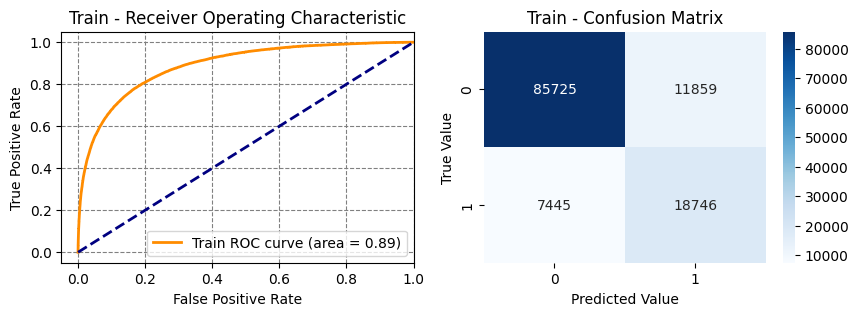

Test  Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.88      0.90     32529
           1       0.61      0.72      0.66      8730

    accuracy                           0.84     41259
   macro avg       0.76      0.80      0.78     41259
weighted avg       0.85      0.84      0.85     41259



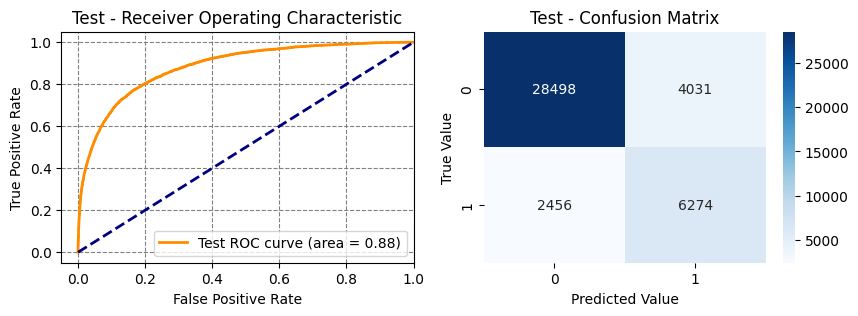

In [86]:
XGB_classifier = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=250, subsample=0.8, random_state=random_state)
XGB_classifier.fit(X_resample, y_resample)
matrix_df.loc[len(matrix_df)] = accuracy_report('XGBClassifier', XGB_classifier, X_train, y_train, X_test, y_test, plotting=True)

#### 3. MLP Classifier

Train Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     97584
           1       0.55      0.77      0.64     26191

    accuracy                           0.82    123775
   macro avg       0.74      0.80      0.76    123775
weighted avg       0.85      0.82      0.83    123775



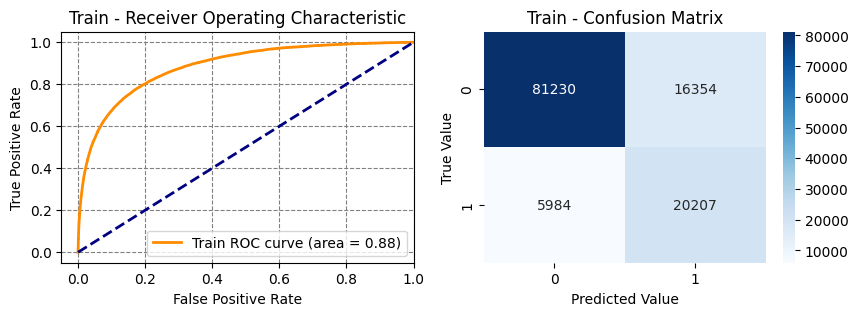

Test  Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     32529
           1       0.55      0.77      0.64      8730

    accuracy                           0.82     41259
   macro avg       0.74      0.80      0.76     41259
weighted avg       0.85      0.82      0.83     41259



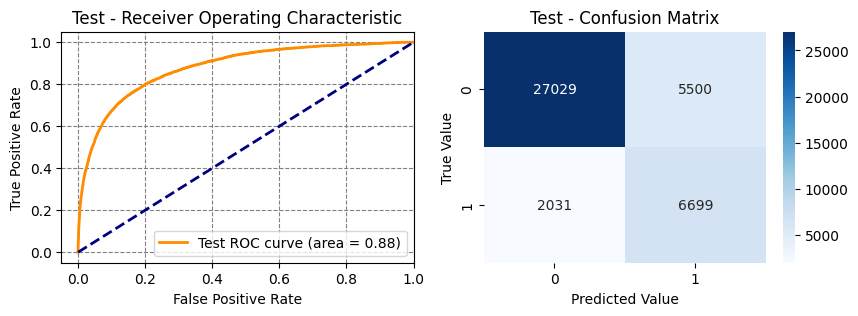

In [87]:
MLP_classifier = MLPClassifier(hidden_layer_sizes=500, batch_size=500, activation='relu', solver="adam", learning_rate_init=0.05, max_iter=200, shuffle=True, random_state=random_state)
MLP_classifier.fit(X_resample, y_resample)
matrix_df.loc[len(matrix_df)] = accuracy_report('MLPClassifier', MLP_classifier, X_train, y_train, X_test, y_test, plotting=True)

#### 4. Logistic Regression Classifier

Train Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     97584
           1       0.51      0.79      0.62     26191

    accuracy                           0.80    123775
   macro avg       0.72      0.79      0.74    123775
weighted avg       0.84      0.80      0.81    123775



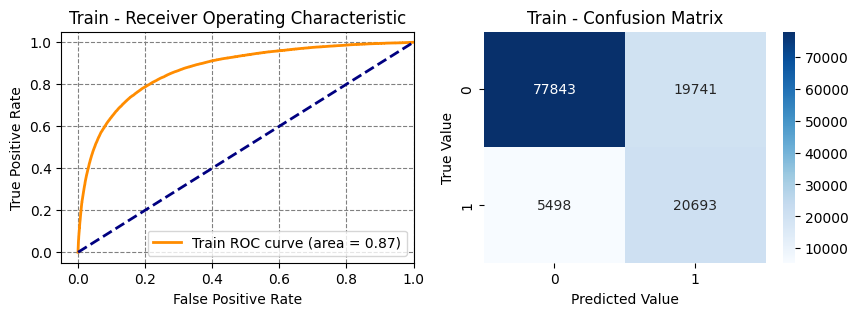

Test  Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     32529
           1       0.51      0.79      0.62      8730

    accuracy                           0.79     41259
   macro avg       0.72      0.79      0.74     41259
weighted avg       0.84      0.79      0.81     41259



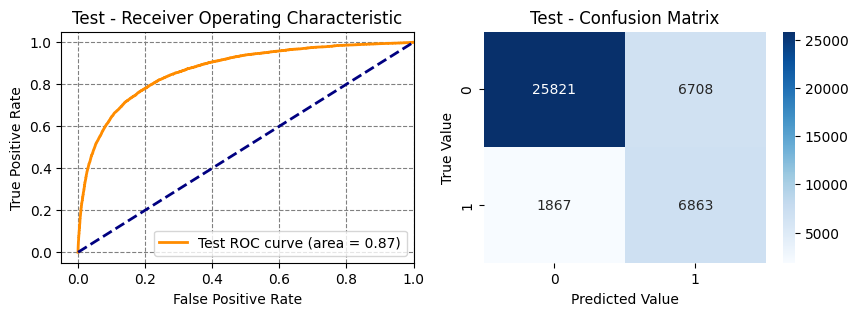

In [88]:
LR_classifier = LogisticRegression(C=10, penalty='l1', solver='liblinear')
LR_classifier.fit(X_resample, y_resample)
matrix_df.loc[len(matrix_df)] = accuracy_report('LogisticRegression', LR_classifier, X_train, y_train, X_test, y_test, plotting=True)

#### 5. Random Foest Classifier

Train Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     97584
           1       0.55      0.79      0.65     26191

    accuracy                           0.82    123775
   macro avg       0.74      0.81      0.76    123775
weighted avg       0.86      0.82      0.83    123775



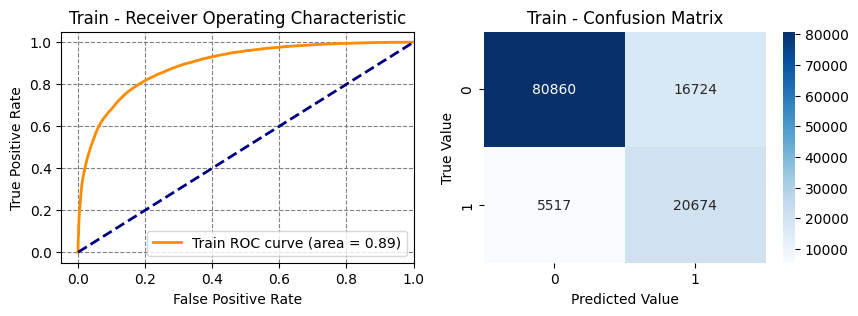

Test  Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.82      0.87     32529
           1       0.54      0.78      0.64      8730

    accuracy                           0.81     41259
   macro avg       0.74      0.80      0.76     41259
weighted avg       0.85      0.81      0.82     41259



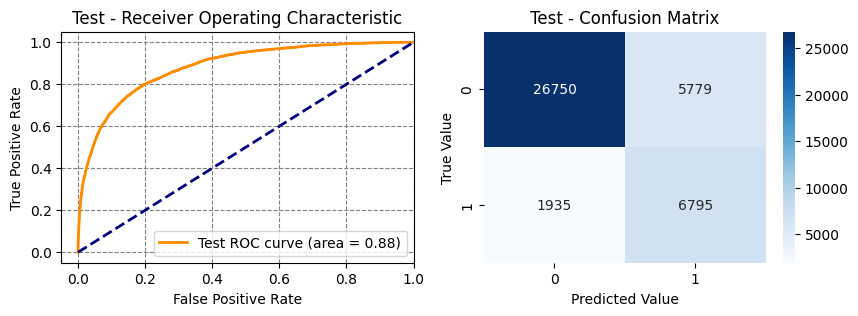

In [89]:
RF_classifier = RandomForestClassifier(n_estimators=100, min_samples_split=6, min_samples_leaf=1, max_features='sqrt', max_depth=10, bootstrap=True, random_state=random_state)
RF_classifier.fit(X_resample, y_resample)
matrix_df.loc[len(matrix_df)] = accuracy_report('RandomForestClassifier', RF_classifier, X_train, y_train, X_test, y_test, plotting=True)

#### 6. Keras Sequential DeepLearing model

1290/1290 [==============================] - 0s 292us/step
Train Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     97584
           1       0.68      0.90      0.78     26191

    accuracy                           0.89    123775
   macro avg       0.83      0.89      0.85    123775
weighted avg       0.91      0.89      0.90    123775



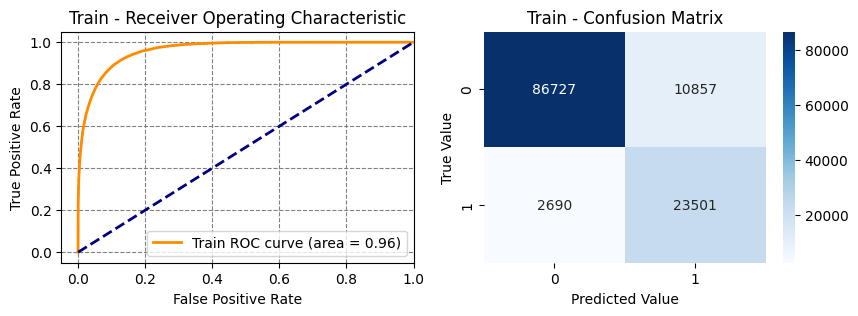

Test  Classification Report:
------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     32529
           1       0.51      0.68      0.58      8730

    accuracy                           0.79     41259
   macro avg       0.71      0.75      0.72     41259
weighted avg       0.82      0.79      0.80     41259



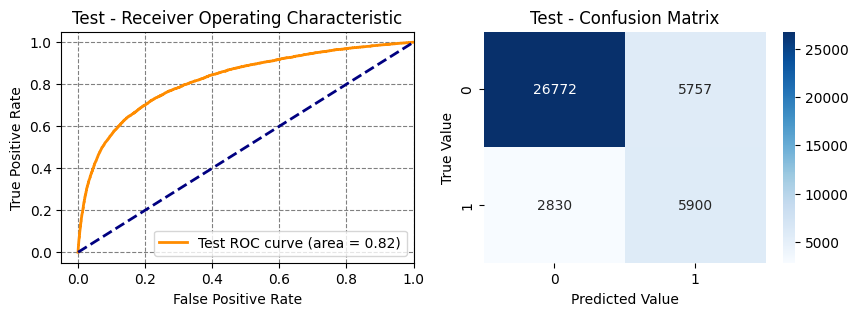

In [90]:
KS_classifier = keras.Sequential([
    keras.layers.Dense(484, input_shape=(22,), activation='relu'),
    keras.layers.Dense(121, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
KS_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
callback = keras.callbacks.EarlyStopping(monitor='auc', patience=3)
KS_classifier.fit(X_resample, y_resample, epochs=100, callbacks=[callback], verbose=0)
matrix_df.loc[len(matrix_df)] = accuracy_report('keras.Sequential', KS_classifier, X_train, y_train, X_test, y_test, plotting=True)

### Model Performances Plotting and Analysis 

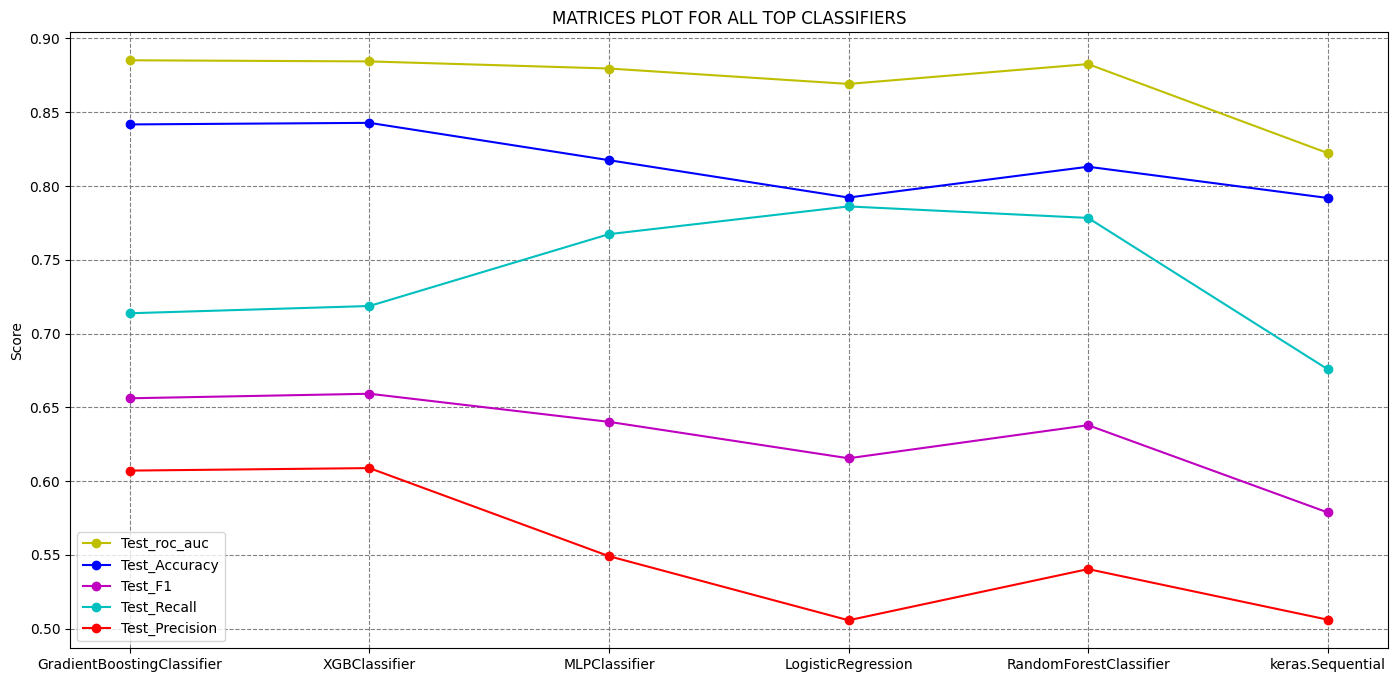

In [92]:
plt.subplots(figsize=(17,8))
plt.plot(matrix_df['model'],matrix_df['test_roc_auc'],c='y',marker='o',label='Test_roc_auc')
plt.plot(matrix_df['model'],matrix_df['Test_Accuracy'],c='b',marker='o',label='Test_Accuracy')
plt.plot(matrix_df['model'],matrix_df['Test_F1'],c='m',marker='o',label='Test_F1')
plt.plot(matrix_df['model'],matrix_df['Test_Recall'],c='c',marker='o',label='Test_Recall')
plt.plot(matrix_df['model'],matrix_df['Test_Precision'],c='r',marker='o',label='Test_Precision')
plt.grid(which='both', color='gray', linestyle='--')
plt.legend()
plt.title('MATRICES PLOT FOR ALL TOP CLASSIFIERS')
plt.ylabel("Score")
#plt.xlabel("Classifier")
plt.show()

In [107]:
color = (matrix_df.model == 'RandomForestClassifier').map({True: 'background-color: yellow', False: ''})
matrix_df.style.apply(lambda s: color)

,model,Train_Accuracy,Train_Precision,Train_Recall,Train_F1,train_roc_auc,Test_Accuracy,Test_Precision,Test_Recall,Test_F1,test_roc_auc
0,GradientBoostingClassifier,0.845752,0.615932,0.720018,0.663921,0.890271,0.841707,0.607132,0.713746,0.656136,0.885173
1,XGBClassifier,0.844040,0.612514,0.715742,0.660117,0.887835,0.842774,0.608831,0.718671,0.659207,0.884408
2,MLPClassifier,0.819527,0.552693,0.771525,0.644027,0.884240,0.817470,0.549143,0.767354,0.640164,0.879589
3,LogisticRegression,0.796090,0.511772,0.790081,0.621178,0.871646,0.792167,0.505711,0.786140,0.615488,0.869151
4,RandomForestClassifier,0.820311,0.552810,0.789355,0.650238,0.892351,0.813035,0.540401,0.778351,0.637908,0.882582
5,keras.Sequential,0.890551,0.684004,0.897293,0.776264,0.962471,0.791876,0.506134,0.675830,0.578800,0.822321


In churn analysis, the main goal is to identify customers who are likely to churn so that appropriate actions can be taken to retain them. The best model is the one that can generate the most correct predictions. However, in this business context, the percentage of False Negative (FN) is important.

Prioritizing "RECALL" ensures that the model can avoid mistakenly predicting no churn that is actually churn, thereby increasing the chances of taking proactive action to retain those customers and having a good business impact. In addition, the ROC-AUC score provides a comprehensive measure of the model’s performance across various classification thresholds and demonstrates the model’s ability to correctly rank classes. This approach allows for a more balanced evaluation and selection of models based on their ability to accurately predict the target variable.

The best model is selected from the model that produces the high average RECALL value also considering high Precision, Accuracy and ROC_AUC (highlighted above) of the test data and does not indicate overfitting and underfitting. Based on the table above, the selected model is RandomForestClassifier with an average RECALL for the testing data of 0.778351 and ROC_AUC 0.882582

# Create 'submission.csv' with best model

In [139]:
sample_sub['Exited'] = RF_classifier.predict_proba(test_X_scaled)[:,1]
sample_sub.to_csv('sample_submission_best_model.csv', index=False)
np.round(sample_sub['Exited']).value_counts()

Exited
1.0    76369
0.0    33654
Name: count, dtype: int64